# Forward Computation
- $p(l|x)$을 구하려면 상정 가능한 모든 경로들에 대해 모든 시점, 상태에 대한 확률을 계산해야 한다.
- 시퀀스 길이가 길어지거나 상태(음소) 개수가 많아지면 계산량이 폭증하는 구조
- CTC에서도 이를 방지하기 위해 Hidden Markov Model과 같이 Forward/Backward Algorithm을 사용한다.

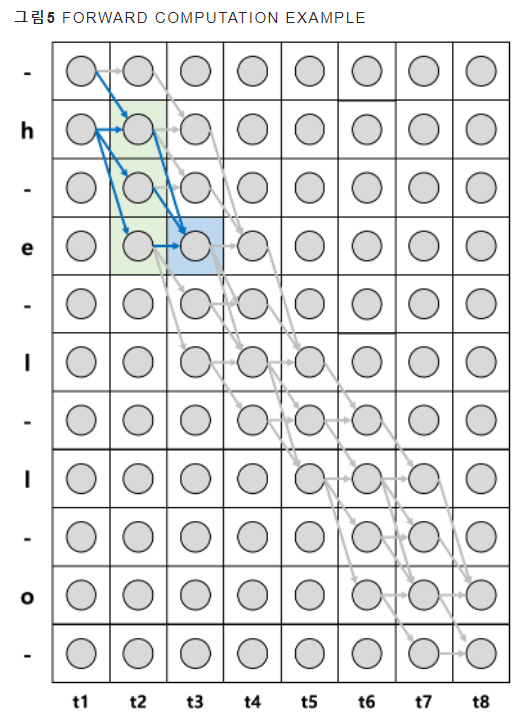

- 그림5의 파란색 칸의 전방 확률(Forward Probability)를 구한다.($a_3(4)$)
- $t = 1$시점 $s = 1$의 상태(-) 혹은 $t = 1$시점 $s = 2$의 상태(h)에서 시작해 시간 순으로 전이가 이루어져 $t = 3$시점에 $s = 4$의 상태(e)가 나타날 확률을 가리킨다.
- $t = 3$시점에 e가 나타나려면 모든 경로 가운데 4가지 경우의 수만 존재한다. ('-he', 'hhe', 'h-e', 'hee')
- 해당 경로들은 그림5에서 파란색 화살표로 표시되어 있음.

- '-he'가 나타날 확률은 이미 조건부 독립을 가정했으므로 각 시점에 해당 상태가 나타날 확률을 단순히 곱셈해준다.('hhe', 'h-e', 'hee'도 같은 방식)
- 모두 더한 결과는 $a_3(4)$가 된다. (수식4)

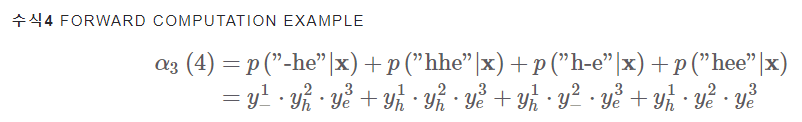

- 전방확률 계산을 일반화한 식은 수식5
- 전방확률은 $1 : t$ 시점에 걸쳐 레이블 시퀀스가 $1 : s$가 나타낼 확률을 의미함.
- 수식5를 이해할 때 핵심은 계산 대상 경로인 $π$(수식4의 예시는 '-he', 'hhe', 'h-e', 'hee')를 의미한다.

### 계산 대상이 되는 $π$의 조건
- 1. $1 : t$ 시점까지의 $π$에서 blank와 중복 레이블을 제거한 결과가 $1 : s$까지의 정답 레이블 시퀀스와 일치해야 한다. 수식4의 예시를 보면 blank와 중복 레이블을 제거한 결과가 'he'인 모든 경로('-he', 'hhe', 'h-e', 'hhe')를 의미한다.
- 2. $π$는 개별 요소가 상태(음소)인 시퀀스. 요소 각각이 $N$개의 범주를 가지며 시퀀스 전체 길이는 $T$이다. CTC는 입력 음소 시퀀스(그 길이는 $T$) 각각에 대해 음소 레이블을 부여(alignment)해주는 역할을 수행한다는 사실과 연관지어 이해해보면 좋을 것이다.

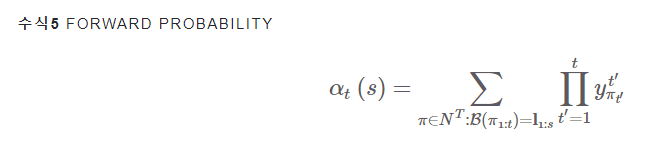

- 수식5처럼 계산할 경우 계산량이 너무 많아진다.
- 겹치는 부분은 저장해뒀다가 다시 써먹으면 효율적이다.
- 이와 같은 알고리즘을 다이내믹 프로그래밍(Dynamic Programming)이라고 한다.
- 수식4에서 겹치는 부분을 찾아 다시 쓰면 수식6과 같다.
- $a_2(2)$, $a_2(3)$, $a_2(4)$는 그림5에서 녹색으로 칠한 칸을 나타낸다.
- 전방확률 계산에 다이내믹 프로그래밍을 적용한 기법을 Forward Algorithm이라고 한다.
- Forward Algorithm을 적용하게 되면 $t$시점에 전방확률을 구할 때 이전 시점 $(t-1)$에 이미 계산해 놓은 전방확률 값들을 재사용할 수 있게 된다.

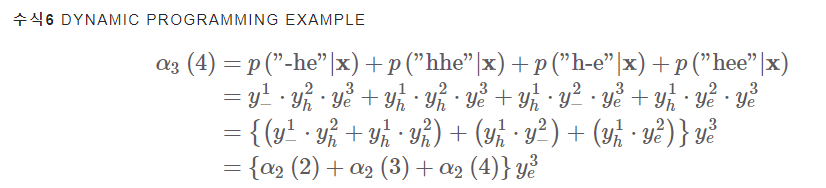

- Forward Algorithm을 일반화해서 적용할 때 고려해야 하는 경우가 두 가지 있다.
- 계산 대상 현재 상태가 blank이거나, 현재 상태와 그 직직전 상태가 일치할 경우(CASE1)와 그 이외 케이스(CASE2)를 구분해야 한다는 점이다.
- 앞서 Forward Algorithm 계산 예시로 든 수식6의 경우 CASE2에 해당한다.

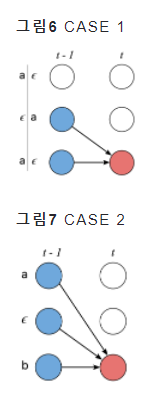

- 이상의 논의를 종합하여 전방 확률 계산을 도식적으로 나타낸 그림은 그림8이다.
- 경로는 blank 혹은 레이블 시퀀스 $l^\prime$의 첫번째 요소로 시작한다. $l^\prime$의 마지막 요소 혹은 blank로 끝을 맺는다.
- 경로 중간에 있는 상태들의 전방 확률 계산은 CASE1 혹은 CASE2에만 해당하므로 해당 케이스에 맞춰 계산해준다.
- 이를 식으로 표현하면 수식7과 같다.

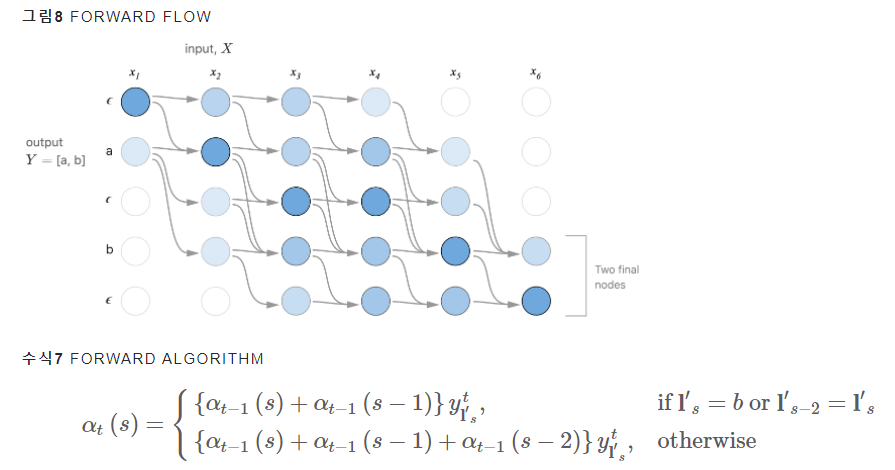